## Supervised learning

Классификация - предсказание на основе размеченных данных.

В кластеризации у нас были данные $X$ размерности $(m, n)$, $m$ - количество объектов, которые мы стараемся разделить на K осмысленных групп.

В классификации, у нас есть данные $X$ размерности $(m, n)$ и $Y (m, 1)$, где $Y$ - это так называемая целевая переменная. Каждому объекту из $X$ сопоставлена метка/значение из $Y$. Задача - для новых данных $X^*$ предсказать правильные значения $Y^*$. Другими словами, нужно выучить некоторую функцию $$f(X)=Y$$ которая может затем использоваться для любых других входных данных.

В качестве Y могут использоваться как метки классов (собственно задача классификации), так и некоторые значения (задача регрессии)

## Задача классификации

![](https://upload.wikimedia.org/wikipedia/commons/9/97/Classifier.svg)

**Классификация** - попытка предсказать класс объекта на основе существующих данных.

Примеры: 
- пойдёт завтра дождь или нет
- есть ли на изображении объект
- будет выдан кредит или нет
- болен человек или нет
- ...

В классификации по умолчанию переменная $Y$ - категориальная, состоящая из нескольких классов. Для классических алгоритмов, мы по умолчанию считаем, что $|Y|=2$, причем классы обозначены $\{0, 1\}$ или $\{-1, 1\}$ (в некоторых алгоритмах важны данные значения, в некоторых классы можно называть хоть строчками.

Для решения задачи классификации придуманы различные алгоритмы: логистическая регрессия, KNN (алгоритм ближайших соседей), Деревья решений (Случайный лес и др.), Бустинг, SVM (Машина опорных векторов), нейроночки.

Каждый из алгоритмов строит свою математическую модель или решает задачу своим способом. Важными показателями для алгоритмов являются скорость работы, область практического использования и интерпретируемость модели.

## Деревья решений

![](tree.png)

Деревья решений - алгоритм, создающий одновременно модель классификации данных и удобную структуру представления этой же модели. 

Словарь: корень (корневой узел), родитель/предок, потомок, лист.

Под деревом понимается бинарная структура, которая на каждой глубине разделяется на 2 поддерева. Данное разделение всегда происходит по одному из признаков, по некоторому "разделочному" значению. Разделение происходит по информационному признаку: чем больше информации даёт разделение - тем лучше. Построение дерева происходит по обучающей выборке (для которой известны метки); построение завершается когда в каждом "листе" дерева (конечном узле) остались только объекты одного класса. Объекты по сути перемещаются от корня дерева к какому-нибудь листу следуя указаниям промежуточных узлов. При тестовом использовании модели, новый объект таким же образом перемещается от корня к какому-нибудь листу: попадая в лист, объекту присваивается класс этого листа, то есть класс объектов из этого листа.

Пример - что такое информация?

![](https://hsto.org/storage2/173/96f/27f/17396f27f81e9bb312f2f01aa1254dbe.png)

Для математического подсчёта информации используются либо энтропия, либо критерий Джинни.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import *

In [2]:
X, y = load_breast_cancer(return_X_y=True)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
X.shape

(569, 30)

## Метрики качества модели <a name="metrics"></a>

В задаче классификации в качестве метрик качества, как правило, используют метрики связанные с так называемой матрицей смежности. 
Метрики в питоне можно посмотреть [здесь](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

![](confusion.PNG)

$TP$, True Positive - Число правильно угаданных объектов положительного класса

$TN$, True Negative - Число правильно угаданных объектов отрицательного/негативного/нулевого класса

$FP$, False Positive - Число объектов класса 0, определённых к классу 1, ошибка 1-го рода

$FN$, False Negative - Число объектов класса 1, определённых к классу 0, ошибка 2-го рода

$$N = TP+TN+FP+FN$$

$$Accuracy = \frac{TP+TN}{N}$$

$$Recall = \frac{TP}{TP+FN}$$

$$Precision=\frac{TP}{TP+FP}$$

$$F1-score=\frac{2*Recall*Precision}{Recall+Precision}$$

а также, $Specificity, Sensitivity, ROC AUC$ и другие...

In [5]:
y_pred = np.ones(y.shape)
print("Accuracy: ", accuracy_score(y, y_pred))
pd.DataFrame(confusion_matrix(y, y_pred))

Accuracy:  0.6274165202108963


,0,1
0,0,212
1,0,357


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       157
           1       0.95      0.95      0.95       242

    accuracy                           0.94       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.94      0.94      0.94       399



In [9]:
dt.predict_proba(X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

### ROC AUC

Введём понятие вероятность положительного предсказания $p(x)$. Под этим понятием мы будем понимать оценку вероятности того, что объект принадлежит положительному классу. 

$ROC AUC$ (Receiver Operating Characteristic Area Under Curve) - комплексная метрика оценки качества бинарной классификации. С одной стороны это самая сложная метрика, использующая не предсказанные классы, а вероятности положительного предсказания $p(x)$, все возможные уровни значимости и confusion matrix. 

Порядок построения ROC-кривой следующий:
- Для каждого значения $\alpha$ оцениваются $FPR$ и $TPR$ - False Positive Rate и True Positive Rate:
$$TPR = Recall = \frac{TP}{TP+FN}$$
$$FPR = \frac{FP}{FP+TN}$$
- Значение $\alpha$ выбирается от 0 до 1. Значения $TP$, $FP$, $FN$ и $TN$ подсчитываются из вероятностей: модель предсказывает класс 0, если $p(x) < \alpha$, иначе класс 1.
- $FPR$ и $TPR$ откладываются на осях X, Y соответственно. Для всех $\alpha$ строятся точки, которые последовательно соединяются. Полученная кривая - это $ROC$. Площадь под кривой - $ROC AUC$. 

Что это всё даёт нам на практике? Во-первых, $FPR$ и $TPR$ совместно позволяют нам отслеживать баланс классов. Так, если предположить, что оба класса сбалансированы и $FPR > TPR$, точность будет меньше 50%, что является неудовлетворительным результатом. Поэтому, будем считать, что $FPR < TPR$ для хорошей модели.

Во-вторых, изменение $\alpha$ позволяет нам контролировать ошибки 1го и 2го рода. Как мы помним, для некоторых приложений особо важно не допускать ошибок 2го рода, пусть взамен мы получаем большое количество ложно-положительных результатов. Значит, изменяя $\alpha$, мы проверяем классификатор во всех режимах работы.

Наконец, чем сильнее разница между $TPR$ и $FPR$, тем выше расположены точки на графике, тем больше площадь под кривой. Таким образом, $ROC AUC$ тем больше, чем лучше предсказательная способность модели при любом уровне значимости. 

Покажем на примере.

In [10]:
from IPython.display import clear_output

In [16]:
#objects = [0, 0, 1, 0, 1, 1, 0, 1, 1]
objects = [0, 1, 0, 1, 0, 1, 0, 1, 0]
#objects = [0, 0, 0, 0, 1, 1, 1, 1, 1]
p_x = [0.05, 0.1, 0.15, 0.3, 0.45, 0.5, 0.5, 0.7, 0.9]
example = pd.DataFrame()
example['class'] = objects
example['p(x)'] = p_x
display(example)

,class,p(x)
0,0,0.05
1,1,0.10
2,0,0.15
3,1,0.30
4,0,0.45
5,1,0.50
6,0,0.50
7,1,0.70
8,0,0.90


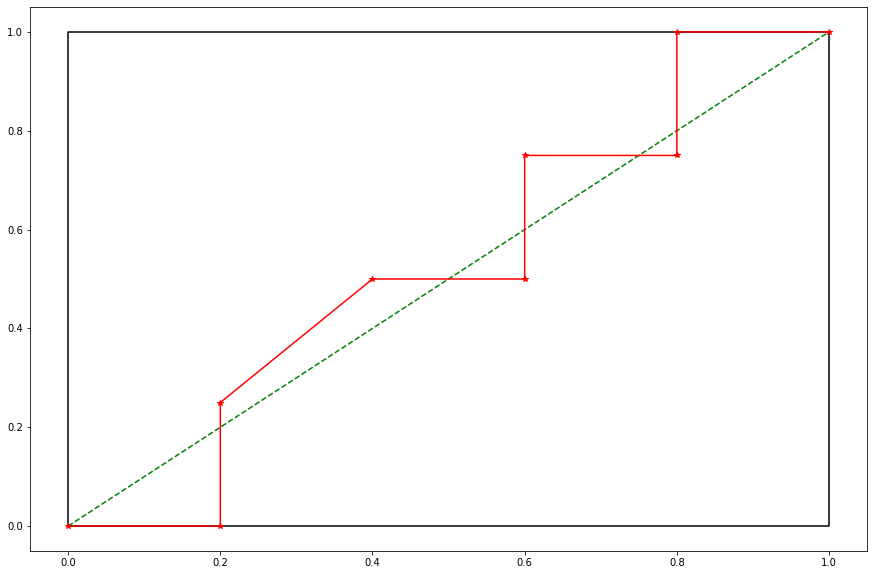

In [17]:
def calculate_alpha(i, example):
    previous_alpha = -0.01
    next_alpha = 1.01
    if i != 0:
        previous_alpha = example['p(x)'][i-1]
    if i != example.shape[0]:
        next_alpha = example['p(x)'][i]
    if previous_alpha == next_alpha:
        return 'equal'
    return (previous_alpha + next_alpha) / 2

x = []
y = []
for i in range(example.shape[0] + 1):
    alpha = calculate_alpha(i, example)
    if alpha == 'equal':
        continue
    TP = example[example['p(x)'] > alpha]['class'].sum()
    FP = (1 - example[example['p(x)'] > alpha]['class']).sum()
    TN = (1 - example[example['p(x)'] < alpha]['class']).sum()
    FN = example[example['p(x)'] < alpha]['class'].sum()
    print("Alpha:", alpha)
    print("TP:", TP, " FN:", FN, " FP:", FP, " TN:", TN)
    TPR = TP / (TP+FN)
    FPR = FP / (FP+TN)
    print("FPR:", FPR, " TPR:", TPR)
    print()
    x.append(FPR)
    y.append(TPR)
    plt.figure(figsize=(15,10))
    plt.plot([0, 0, 1, 1, 0], [0, 1, 1, 0, 0], '-k')
    plt.plot([0, 1], [0, 1], '--g')
    plt.plot(x, y, '*-r')
    clear_output()
    plt.show()
    
    
    